In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, prange

### Oppgave 2a

In [68]:

# Dimensjonsløse størrelser
k_B = 1
T = 1
beta = 1 / (k_B * T)

k = 1          
n_particles = 101
n_steps = 200
n_simuls = 100


avstand_kant = n_steps
N = 3*n_particles + 2*avstand_kant


# Konst potensial
def V1(x, k):
    return k

# Lineært potensial 
def V2(x, k):
    return -k * x

# Generer sannsynligheter
def probs(V, x, k):
    pp = 1 / (1 + np.exp(-beta*(V(x-1,k) - V(x+1,k))) + np.exp(-beta*(V(x,k) - V(x+1,k))))
    pm = 1 / (1 + np.exp(-beta*(V(x+1,k) - V(x-1,k))) + np.exp(-beta*(V(x,k) - V(x-1,k))))
    p0 = 1 - (pp + pm)
    
    return pp, pm, p0


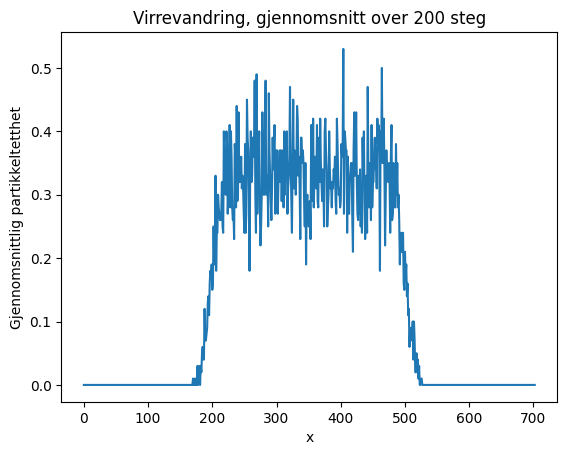

In [69]:

k = 1          
V = V1

def walkStep(p):
    new_p = p.copy()

    for x in range(1, N-1):   # unngå kanter
        for _ in range(int(p[x])):

            r = np.random.rand()
            pp, pm, p0 = probs(V, x, k)

            new_p[x] -= 1

            if r < pm:
                new_p[x-1] += 1
            elif r < pm + pp: 
                new_p[x+1] += 1
            else:
                new_p[x] += 1

    return new_p

# Initialisering
p_instances = np.zeros(N)
positions = np.arange(avstand_kant, avstand_kant + 3*n_particles, 3)
p_instances[positions] = 1


# Simulerer virrevandring
simuls = []

for s in range(n_simuls):
    p = p_instances.copy()

    for step in range(n_steps):
        p = walkStep(p)

    simuls.append(p)

mean_simul = np.mean(simuls, axis=0)

plt.plot(mean_simul)
plt.xlabel("x")
plt.ylabel("Gjennomsnittlig partikkeltetthet")
plt.title("Virrevandring, gjennomsnitt over 200 steg")
plt.show()

### Oppgave 2b

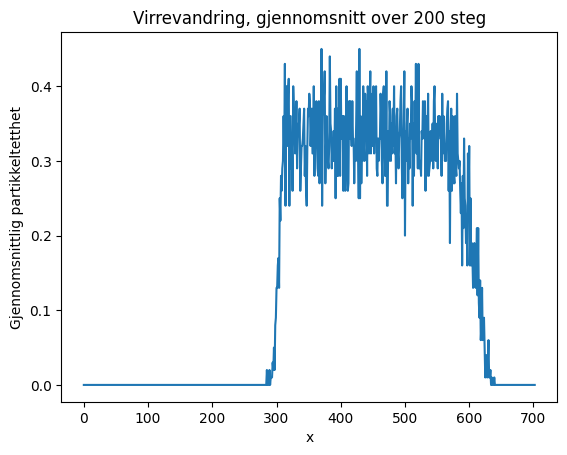

In [62]:

k = 1          
V = V2

def walkStep(p):
    new_p = p.copy()

    # Tilfeldig rekkefølge til indeksene
    xs = np.arange(1, N-1)
    np.random.shuffle(xs)

    for x in xs:   
        for _ in range(int(p[x])):

            rf = np.random.rand()
            pp, pm, p0 = probs(V, x, k)

            new_p[x] -= 1

            if rf < pm and new_p[x-1] == 0:
                new_p[x-1] += 1
            elif rf < pm + pp and new_p[x+1] == 0:
                new_p[x+1] += 1
            else:
                new_p[x] += 1

    return new_p


# Initialisering
p_instances = np.zeros(N)
positions = np.arange(avstand_kant, avstand_kant + 3*n_particles, 3)
p_instances[positions] = 1


# Simulerer virrevandring
simuls = []

for s in range(n_simuls):
    p = p_instances.copy()

    for step in range(n_steps):
        p = walkStep(p)

    simuls.append(p)


mean_simul = np.mean(simuls, axis=0)


plt.plot(mean_simul)
plt.xlabel("x")
plt.ylabel("Gjennomsnittlig partikkeltetthet")
plt.title("Virrevandring, gjennomsnitt over 200 steg")
plt.show()

### Oppgave 2c

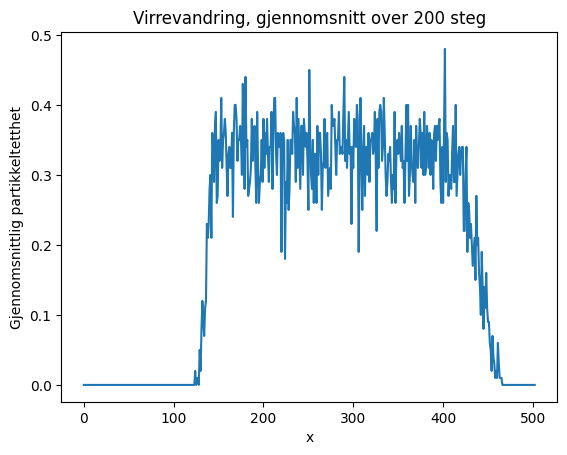

In [ ]:

k = 1000
V = V2

def walkStep(p):
    new_p = p.copy()

    # Tilfeldig rekkefølge til indeksene
    xs = np.arange(1, N-1)
    np.random.shuffle(xs)

    for x in xs:   
        for _ in range(int(p[x])):

            rf = np.random.rand()
            pp, pm, p0 = probs(V, x, k)

            new_p[x] -= 1

            if rf < pm and new_p[x-1] == 0:
                new_p[x-1] += 1
            elif rf < pm + pp and new_p[x+1] == 0:
                new_p[x+1] += 1
            else:
                new_p[x] += 1

    return new_p


# Initialisering
p_instances = np.zeros(N)
positions = np.arange(avstand_kant, avstand_kant + 3*n_particles, 3)
p_instances[positions] = 1


# Simulerer virrevandring
simuls = []

for s in range(n_simuls):
    p = p_instances.copy()

    for step in range(n_steps):
        p = walkStep(p)

    simuls.append(p)


mean_simul = np.mean(simuls, axis=0)


plt.plot(mean_simul)
plt.xlabel("x")
plt.ylabel("Gjennomsnittlig partikkeltetthet")
plt.title("Virrevandring, gjennomsnitt over 200 steg")
plt.show()

### Oppgave 3a

In [ ]:
alpha = 0.8
Tp = 500
T = 10*Tp 
h = 1
Nx = 100
N = 2*Nx
Np = 12*Nx
delta_t = 1
beta = 1
k = 1000


def V1(x):
    x_mod = x % Nx
    if x_mod > alpha * Nx:
        x_mod -= Nx
    
    if x_mod > 0:
        return k * x_mod / (alpha * Nx)
    else:
        return -k * x_mod / ((1 - alpha) * Nx)

# Konstant potensial
def V2(x):
    return 1


# Periodisk potensialer
V1_arr = np.array([V1(x) for x in range(N)])
V2_arr = np.array([V2(x) for x in range(N)])


# Diskrete punkter
x_points = np.arange(0, 2*Nx)


def probs(V_arr):
    pp = np.zeros(N)
    pm = np.zeros(N)
    p0 = np.zeros(N)

    for x in range(N):
        dV_plus = -beta * (V_arr[(x + 1) % N] - V_arr[x])
        dV_minus = -beta * (V_arr[(x - 1) % N] - V_arr[x])
        dV_stay = 0.0

        max_val = max(dV_plus, dV_minus, dV_stay)

        e_plus = np.exp(dV_plus - max_val)
        e_minus = np.exp(dV_minus - max_val)
        e_stay = np.exp(dV_stay - max_val)

        Z = e_plus + e_minus + e_stay

        pp[x] = e_plus / Z
        pm[x] = e_minus / Z
        p0[x] = e_stay / Z

    return pp, pm, p0


pp_V1, pm_V1, p0_V1 = probs(V1_arr)
pp_V2, pm_V2, p0_V2 = probs(V2_arr)

def walkStep(p, pp_arr, pm_arr, p0_arr):
    new_p = np.zeros(N)
    n_plus = 0
    n_minus = 0

    for x in range(N):
        num = int(p[x])
        if num == 0:
            continue

        right, left, stay = np.random.multinomial(num, [pp_arr[x], pm_arr[x], p0_arr[x]])

        new_p[(x + 1) % N] += right
        new_p[(x - 1) % N] += left
        new_p[x] += stay

        n_plus += right
        n_minus += left

    return new_p, n_plus, n_minus


J_norm_hist = []

p_instances = np.full(N, Np // N)

for i in range(int(T/Tp)):
    n_plus_tot = 0
    n_minus_tot = 0

    # V2-halvperiode
    for _ in range(Tp):
        p_instances, n_plus, n_minus = walkStep(p_instances, pp_V2, pm_V2, p0_V2)
        n_plus_tot += n_plus
        n_minus_tot += n_minus

    # V1-halvperiode
    for _ in range(Tp):
        p_instances, n_plus, n_minus = walkStep(p_instances, pp_V1, pm_V1, p0_V1)
        n_plus_tot += n_plus
        n_minus_tot += n_minus

    J_avg = (n_plus_tot - n_minus_tot) / (Np * 2 * Tp)
    J_norm_hist.append(float(J_avg))

print(J_norm_hist)

[-0.029, -0.014416666666666666, -0.012666666666666666, -0.012, -0.01225, -0.01275, -0.012666666666666666, -0.014166666666666666, -0.012833333333333334, -0.013166666666666667]


### Oppgave 3b

In [ ]:

alpha = 0.8
Tp = np.int32(np.linspace(1, 1001, 50))
h = 1
Nx = 100
N = 2*Nx
Np = 40*Nx
delta_t = 1
beta = 1
k = 1000

# Konstante potensialer
def V1(x):
    x_mod = x % Nx
    if x_mod > alpha * Nx:
        x_mod -= Nx

    if x_mod > 0:
        return k * x_mod / (alpha * Nx)
    else:
        return -k * x_mod / ((1 - alpha) * Nx)
    
def V2(x):
    return 1.0

# Diskrete punkter
x = np.arange(N)


def probs(V_arr):
    pp = np.zeros(N)
    pm = np.zeros(N)
    p0 = np.zeros(N)

    for x in range(N):
        dV_plus = -beta * (V_arr[(x + 1) % N] - V_arr[x])
        dV_minus = -beta * (V_arr[(x - 1) % N] - V_arr[x])
        dV_stay = 0.0

        max_val = max(dV_plus, dV_minus, dV_stay)

        e_plus = np.exp(dV_plus - max_val)
        e_minus = np.exp(dV_minus - max_val)
        e_stay = np.exp(dV_stay - max_val)

        Z = e_plus + e_minus + e_stay

        pp[x] = e_plus / Z
        pm[x] = e_minus / Z
        p0[x] = e_stay / Z

    return pp, pm, p0

# Periodiske potensialer
V1_arr = np.array([V1(x) for x in range(N)])
V2_arr = np.array([V2(x) for x in range(N)])


pp_V1, pm_V1, p0_V1 = probs(V1_arr)
pp_V2, pm_V2, p0_V2 = probs(V2_arr)

@njit
def walkStep(p, pp_arr, pm_arr, p0_arr, N):
    new_p = np.zeros(N)
    n_plus = 0
    n_minus = 0

    for x in range(N):
        num = int(p[x])
        if num == 0:
            continue
        probs = np.array([pp_arr[x], pm_arr[x], p0_arr[x]])
        result = np.random.multinomial(num, probs)
        new_p[(x + 1) % N] += result[0]
        new_p[(x - 1) % N] += result[1]
        new_p[x] += result[2]
        n_plus += result[0]
        n_minus += result[1]
    return new_p, n_plus, n_minus


@njit(parallel=True)
def run_all(Tp, pp_V1, pm_V1, p0_V1, pp_V2, pm_V2, p0_V2, N, Nx, Np):
    J_norm_average = np.zeros(len(Tp))

    # Parallellkjøring
    for i in prange(len(Tp)):                
        tp = Tp[i]

        # Initialiser partikler ved minimumene
        index_list = np.arange(N)
        p_instances = np.zeros(N)
        p_instances[index_list % Nx == 0] = Np / 2

        J_sum = 0.0

        for j in range(tp):
            n_plus_tot = 0
            n_minus_tot = 0

            # V2-halvperiode
            for _ in range(tp):
                p_instances, n_plus, n_minus = walkStep(
                    p_instances, pp_V2, pm_V2, p0_V2, N
                )
                n_plus_tot += n_plus
                n_minus_tot += n_minus

            # V1-halvperiode
            for _ in range(tp):
                p_instances, n_plus, n_minus = walkStep(
                    p_instances, pp_V1, pm_V1, p0_V1, N
                )
                n_plus_tot += n_plus
                n_minus_tot += n_minus

            J_sum += (n_plus_tot - n_minus_tot) / (Np * 2 * tp)

        J_norm_average[i] = J_sum / tp

    return J_norm_average


J_norm_average = run_all(
    Tp, pp_V1, pm_V1, p0_V1, pp_V2, pm_V2, p0_V2, N, Nx, Np
)
print(J_norm_average)

[ 0.00000000e+00  0.00000000e+00 -2.97441999e-05 -5.44810094e-04
 -1.62849494e-03 -3.24370817e-03 -4.63431159e-03 -6.26497628e-03
 -7.65030116e-03 -8.69417533e-03 -9.79744200e-03 -1.04160494e-02
 -1.10935027e-02 -1.15940698e-02 -1.19744547e-02 -1.23888582e-02
 -1.26493982e-02 -1.27825785e-02 -1.29031782e-02 -1.30324025e-02
 -1.31189436e-02 -1.31719291e-02 -1.31592849e-02 -1.30653576e-02
 -1.31440546e-02 -1.30524259e-02 -1.29535202e-02 -1.29166749e-02
 -1.28438432e-02 -1.27627588e-02 -1.26639970e-02 -1.26084382e-02
 -1.24696060e-02 -1.23653902e-02 -1.22778405e-02 -1.21729424e-02
 -1.20499329e-02 -1.19202684e-02 -1.18417830e-02 -1.17270752e-02
 -1.16142551e-02 -1.14905705e-02 -1.13796484e-02 -1.12802802e-02
 -1.11424919e-02 -1.10666962e-02 -1.09464899e-02 -1.08348524e-02
 -1.07268846e-02 -1.06360548e-02]
